<h1 style="background-color:darkblue;color:white;padding:10px;text-align:left;font-size:45px;border-bottom:5px solid white;">
EVOLUTION DES CYCLES METEROLOGIQUES<br>
</h1>

<p style="font-size:15px">Florent Beausseron</p>
<p style="font-size:15px">Juin 2022</p><br>

<h1 style="color:#0b3fcd;font-size:33px">1. Résumé

<h2 style="color:#2c91ff;font-size:25px">1.1 But du projet

Mon projet consiste à évaluer l'évolution des températures et des précipitations sur le canton de Neuchâtel depuis 1900 jusqu'à nos jours.

Ceci afin de mettre en image la vitesse de ces évolutions, leurs tendances (négatives ou positives) et de repérer les répétitions des éventuels cycles chauds/froids pour savoir si ces derniers sont réguliers ou non.

<h2 style="color:#2c91ff;font-size:25px">1.2 Aperçu des résultats

J'ai travaillé sur deux données principales, les températures et les précipitations moyennes enregistrées dans les stations de Chaumont, de La Chaux-de-Fonds et de Neuchâtel. Avec ces bases, j'ai pu générer des moyennes des températures sur tout le canton, par station et par cycle été / hiver.

Pour plus de détails et de compréhension des résultats obtenus, j'ai aussi isolé ces évolutions par cycle générationnel (20 ans) afin de repérer les hausses significatives.

> Températures moyennes du canton de Neuchâtel :

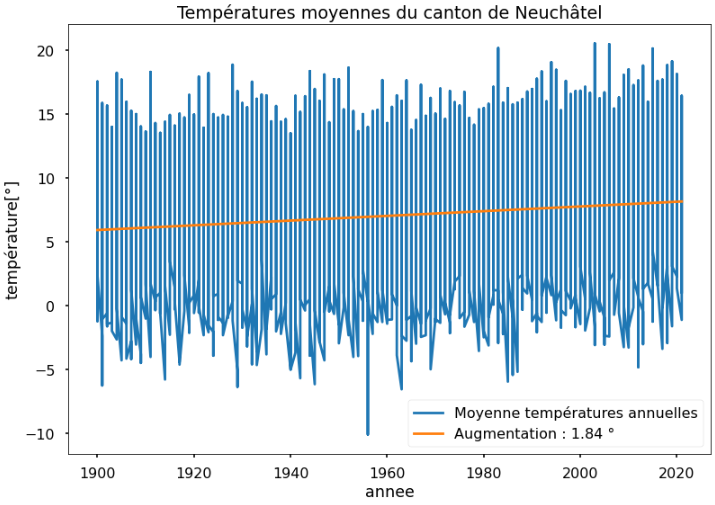

> Précipitations moyennes du canton de Neuchâtel :

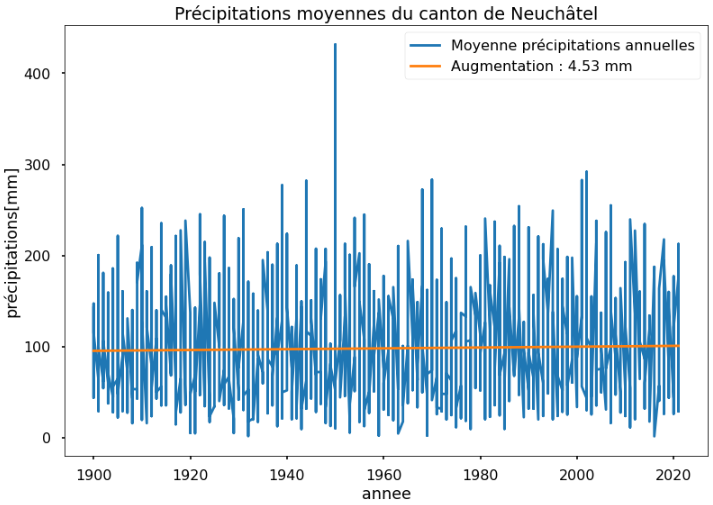

<h1 style="color:#0b3fcd;font-size:33px">2. Les données

<h2 style="color:#2c91ff;font-size:25px">2.1 Récupération des données

Les données sont disponibles sous format .txt depuis le site de la confédération dédié.
Voici le lien :
https://www.meteosuisse.admin.ch/home/climat/le-climat-suisse-en-detail/donnees-homogeneisees-depuis-1864.html

<h2 style="color:#2c91ff;font-size:25px">2.2 Packages utilisés

Les packages utilisés pour le traitement et la mise en forme des données sont les suivants :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw

<h2 style="color:#2c91ff;font-size:25px">2.3 Méthodes et traitement des données

Les données étant sur une seule colonne, il a fallu faire en sorte que les données correspondent aux titres et générer des colonnes pour le dataframe. Pour cela, j'ai intégré les critères <em>skiprows</em> et <em>skipfooter</em> pour générer des dataframes à partir d'un certain nombre et jusqu'à un certain nombre de lignes. Les colonnes générées sont renommées et j'intègre le critère <em>infer_nrows</em> pour garder les valeurs négatives afin de ne pas fausser nos résultats.


In [2]:
'''-------------------------------------------------Cleaning databases-------------------------------------------------'''
# cleaning data base Neuchâtel
df_NEU = pd.read_fwf("homog_mo_NEU.txt",skiprows=460,skipfooter=4,names=['annee','mois','temp NEU','pluie NEU'],index_col=False)
x=df_NEU["annee"]
df_NEU = pd.read_fwf("homog_mo_NEU.txt",skiprows=460,skipfooter=4,names=['annee','mois','temp NEU','pluie NEU'],index_col=False, infer_nrows=x.size)

# cleaning data base Chaumont
df_CHM = pd.read_fwf("homog_mo_CHM.txt",skiprows=460,skipfooter=4,names=['annee','mois','temp CHM','pluie CHM'],index_col=False)
x=df_CHM["annee"]
df_CHM = pd.read_fwf("homog_mo_CHM.txt",skiprows=460,skipfooter=4,names=['annee','mois','temp CHM','pluie CHM'],index_col=False, infer_nrows=x.size)

# cleaning data base Chaux-de-Fonds
df_CDF = pd.read_fwf("homog_mo_CDF.txt",skiprows=28,skipfooter=4,names=['annee','mois','temp CDF','pluie CDF'],index_col=False)
x=df_CDF["annee"]
df_CDF = pd.read_fwf("homog_mo_CDF.txt",skiprows=28,skipfooter=4,names=['annee','mois','temp CDF','pluie CDF'],index_col=False, infer_nrows=x.size)

Lors des premières manipulations de nos bases de données, on remarque que celle de La Chaux-de-Fonds commence en 1900 à l'instar des deux autres qui débutent depuis 1864. Afin d'avoir un panel de donnée semblable, je décide de supprimer les premières lignes des bases de Neuchâtel et de Chaumont. Malgré cela, la période couverte est assez grande pour avoir une bonne estimation des évolutions.<br>

Ensuite, je fais une concaténation pour ne travailler que sur un seul DataFrame :

In [3]:
'''-------------------------------------------------Concatenation databases-------------------------------------------------'''
# delete columns and concatenation for a global table of data
del df_CHM["annee"]
del df_CHM["mois"]
del df_CDF["annee"]
del df_CDF["mois"]
df = pd.concat([df_NEU,df_CHM,df_CDF], axis=1)
df

,annee,mois,temp NEU,pluie NEU,temp CHM,pluie CHM,temp CDF,pluie CDF
0,1900,1,1.9,90.9,-2.5,169.7,NaN,167.5
1,1900,2,3.3,86.7,0.0,150.7,NaN,104.3
2,1900,3,1.2,29.9,-3.6,53.2,NaN,48.8
3,1900,4,7.8,43.7,2.8,66.5,NaN,72.4
4,1900,5,11.7,72.5,6.3,108.7,NaN,79.1
...,...,...,...,...,...,...,...,...
1459,2021,8,18.1,61.3,13.5,71.1,13.8,67.8
1460,2021,9,17.1,57.9,13.2,52.4,13.0,56.2
1461,2021,10,10.3,54.9,7.5,70.8,7.5,99.9
1462,2021,11,4.8,15.8,2.1,29.6,1.8,41.4


A partir de là, je peux générer les graphiques pour les températures et les précipitations moyennes de l'ensemble du canton :

> <p style="color:green"> Graphique des températures moyennes annuelles du canton :

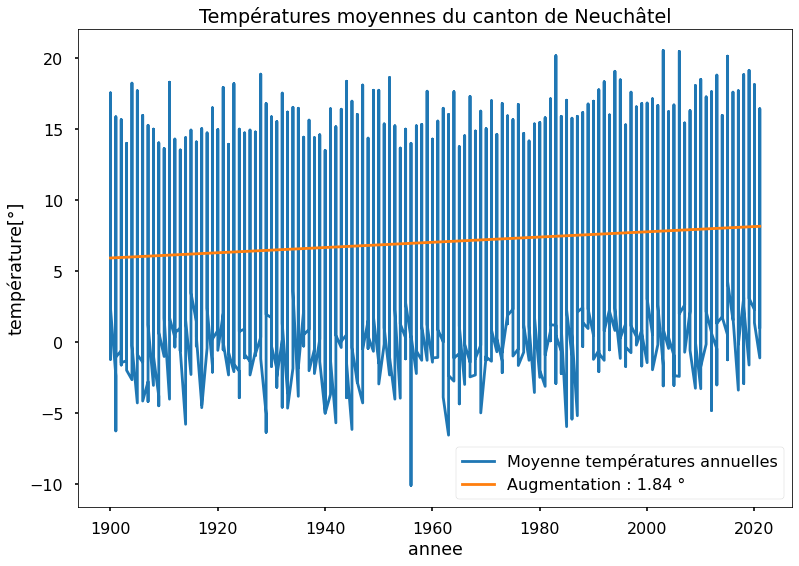

In [5]:
'''-------------------------------------------------Global temperature-------------------------------------------------'''
# creation of the dataframe to have an overall average of temperatures
df_temp = pd.concat([df_NEU,df_CHM,df_CDF], axis=1)
del df_temp["pluie NEU"]
del df_temp["pluie CHM"]
del df_temp["pluie CDF"]
del df_temp["annee"]
del df_temp["mois"]

x=df["annee"]# extract collumn : annee
x_year=x[12:x.size:12]#extract only the year from 1900

y_temp=df_temp.mean(axis=1)# extract collumn : température
l=[]

for i in range(12,y_temp.size,12):# can be written in a list comprehension as well...#extract only the year from 1900
    j=i+12
    l.append(y_temp[i:j:1])

# making graph
fig = plt.figure()
plt.style.use('seaborn-poster')
plt.title("Températures moyennes du canton de Neuchâtel")
plt.xlabel("annee")
plt.ylabel("température[°]")
plt.plot(x,y_temp,label="Moyenne températures annuelles")
plt.legend()

# add trendline to plot --># trend line source --> https://www.statology.org/matplotlib-trendline/
zz_temp = np.polyfit(x,y_temp, 1)
pente_temp=zz_temp[0] # pente is DELTA_Y/DELTA_X
p_temp = np.poly1d(zz_temp)

pente_temp = round(pente_temp*100,2)
plt.plot(x, p_temp(x),label= 'Augmentation : '+str(pente_temp)+' °')
plt.legend()

> <p style="color:green"> Graphique des précipitations moyennes annuelles du canton :

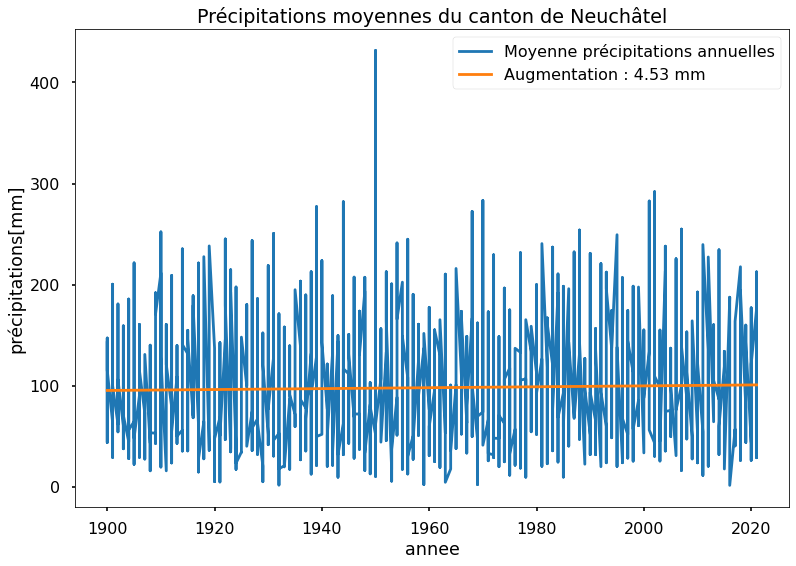

In [6]:
'''-------------------------------------------------Global dive-------------------------------------------------'''
# creation of the dataframe to have an overall average of dives
df_dive = pd.concat([df_NEU,df_CHM,df_CDF], axis=1)

del df_dive["temp NEU"]
del df_dive["temp CHM"]
del df_dive["temp CDF"]
del df_dive["annee"]
del df_dive["mois"]
df_dive.mean(axis=1) # calculation of average dives per line

y_dive=df_dive.mean(axis=1)# extract collumn : précipitations
l=[]

for i in range(12,y_dive.size,12):# can be written in a list comprehension as well...#extract only the year from 1900
    j=i+12
    l.append(y_dive[i:j:1])

# making graph
fig = plt.figure()
plt.style.use('seaborn-poster')
plt.title("Précipitations moyennes du canton de Neuchâtel")
plt.xlabel("annee")
plt.ylabel("précipitations[mm]")
plt.plot(x,y_dive,label="Moyenne précipitations annuelles")
plt.legend()

# add trendline to plot --># trend line source --> https://www.statology.org/matplotlib-trendline/
zz_dive = np.polyfit(x,y_dive, 1)
pente_dive=zz_dive[0] # pente is DELTA_Y/DELTA_X
p_dive = np.poly1d(zz_dive)

pente_dive = round(pente_dive*100,2)
plt.plot(x, p_dive(x),label= 'Augmentation : '+str(pente_dive)+' mm')
plt.legend()

Les premiers résultats montrent qu'il y a une augmentation des températures d'environ 2°C depuis 1900 ainsi qu'une hausse des précipitations d'environ 4.5mm avec un pic important en 1950.

Pour affiner les recherches, je cible les étés chauds et les hivers froids afin de déterminer si des cycles sont repèrables. Le travail se fait par station en prenant en compte les mois de Juin à Septembre pour les étés, et les mois de Décembre à Mars pour les hivers :

Text(1960, 19, 'Trend year increase 2.04°')

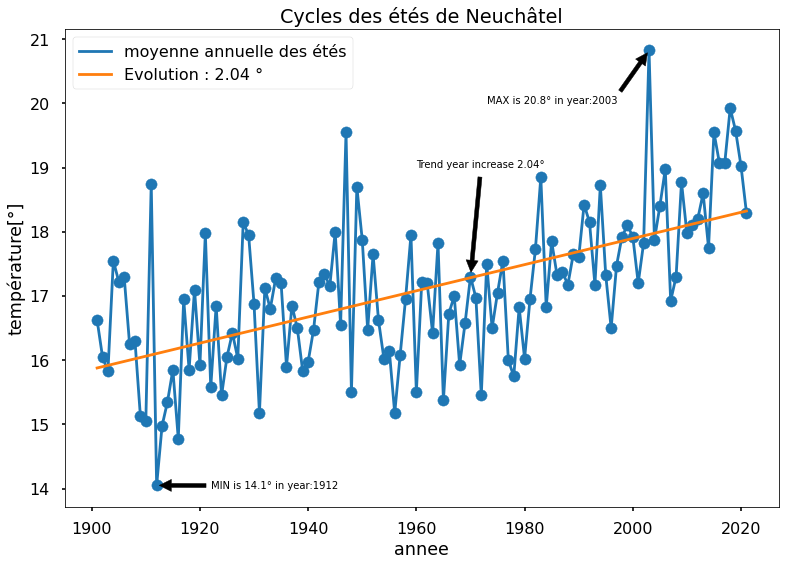

In [7]:
'''-------------------------------------------------Summer cycles-------------------------------------------------'''
###########  NEUCHATEL  #############

x=df["annee"]# extract collumn : annee
df_NEU = pd.read_fwf("homog_mo_NEU.txt",skiprows=460,skipfooter=4,names=['annee','mois','temp NEU','pluie NEU'],index_col=False, infer_nrows=x.size)
x=df_NEU["annee"]# extract collumn : annee
x_year=x[12:x.size:12]#extract only the year from 1900

y = df_NEU['temp NEU']  # extract collumn : température
l = []

for i in range(17, y.size,12):  # can be written in a list comprehension as well...#extract only the year from 1900 --> 17 :because 12 first not usable datas + 5 =JUNE
    j = i + 4  # June =5, 5+4 = 9=  September --> Summer is June --Septembre
    l.append(y[i:j:1].mean())

y_temp_year_mean = pd.Series(l)

# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
ymax_sNEU = max(list(y_temp_year_mean))
xpos_max = list(y_temp_year_mean).index(ymax_sNEU) + 1  # +1 list start from 0
xmax_sNEU = x_year[xpos_max * 12]  # * 12 because series is 12,24,etc....
ymin_sNEU = min(list(y_temp_year_mean))
xpos_min = list(y_temp_year_mean).index(ymin_sNEU) + 1
xmin_sNEU = x_year[xpos_min * 12]  # * 12 because series is 12,24,etc....

fig = plt.figure()
plt.style.use('seaborn-poster')
plt.title("Cycles des étés de Neuchâtel")
plt.xlabel("annee")
plt.ylabel("température[°]")

plt.plot(x_year, y_temp_year_mean, label="moyenne annuelle des étés")
plt.legend()
plt.annotate(f'MAX is {round(ymax_sNEU, 1)}° in year:{xmax_sNEU}', xy=(xmax_sNEU, ymax_sNEU), xytext=(xmax_sNEU -30, 20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'MIN is {round(ymin_sNEU, 1)}° in year:{xmin_sNEU}', xy=(xmin_sNEU, ymin_sNEU), xytext=(xmin_sNEU + 10, 14),
             arrowprops=dict(facecolor='black', shrink=0.05))

x_s = np.array(list(x_year))
y_s = np.array(list(y_temp_year_mean))
plt.scatter(x_s, y_s)

# calculate equation for trendline
zz_sum = np.polyfit(x_s, y_s, 1)  # Y=x*zz3[0]+zz3[1] : https://stackoverflow.com/questions/42985175/how-to-show-equation-of-linear-trendline-made-with-scipy-module-python
pente_sum = zz_sum[0]  # pente is DELTA_Y/DELTA_X
p_sum = np.poly1d(zz_sum)
pente_sum = round(pente_sum*100,2)

# add trendline to plot --># trend line source --> https://www.statology.org/matplotlib-trendline/
plt.plot(x_s, p_sum(x_s), label='Evolution : '+str(pente_sum)+' °')
plt.legend()
plt.annotate(f'Trend year increase {round(pente_sum, 5)}°', xy=(1970, 1970 * zz_sum[0] + zz_sum[1]), xytext=(1960, 19), arrowprops=dict(facecolor='black', shrink=0.05))

Même chose pour les stations de La Chaux-de-Fonds et de Chaumont :

Text(1960, 14.1, 'Trend year increase 2.23°')

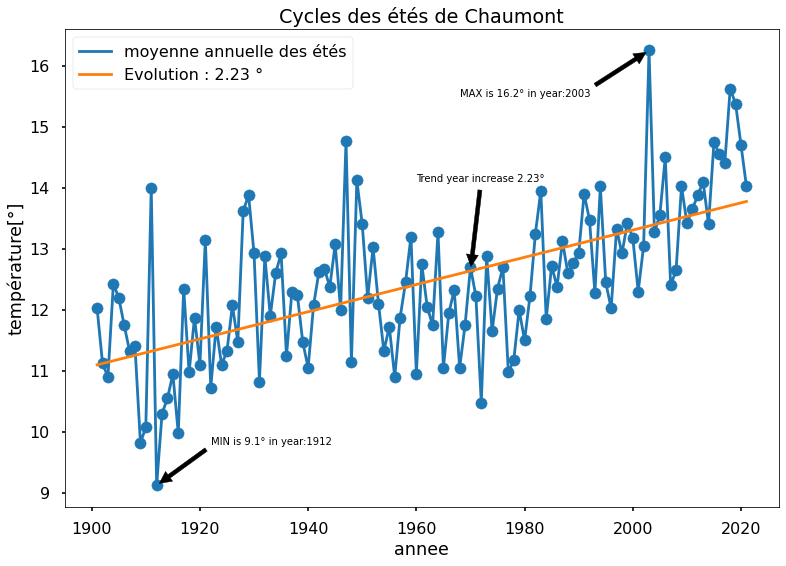

In [34]:
###########  CHAUMONT  #############

df_CHM = pd.read_fwf("homog_mo_CHM.txt",skiprows=460,skipfooter=4,names=['annee','mois','temp CHM','pluie CHM'],index_col=False, infer_nrows=x.size)
x=df_CHM["annee"]# extract collumn : annee
x_year=x[12:x.size:12]#extract only the year from 1900

y = df_CHM['temp CHM']  # extract collumn : température
l = []

for i in range(17, y.size,12):  # can be written in a list comprehension as well...#extract only the year from 1900 --> 17 :because 12 first not usable datas + 5 =JUNE
    j = i + 4  # June =5, 5+4 = 9=  September --> Summer is June --Septembre
    l.append(y[i:j:1].mean())

y_temp_year_mean = pd.Series(l)

# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
ymax_sCHM = max(list(y_temp_year_mean))
xpos_max = list(y_temp_year_mean).index(ymax_sCHM) + 1  # +1 list start from 0
xmax_sCHM = x_year[xpos_max * 12]  # * 12 because series is 12,24,etc....
ymin_sCHM = min(list(y_temp_year_mean))
xpos_min = list(y_temp_year_mean).index(ymin_sCHM) + 1
xmin_sCHM = x_year[xpos_min * 12]  # * 12 because series is 12,24,etc....

fig = plt.figure()
plt.style.use('seaborn-poster')
plt.title("Cycles des étés de Chaumont")
plt.xlabel("annee")
plt.ylabel("température[°]")

plt.plot(x_year, y_temp_year_mean, label="moyenne annuelle des étés")
plt.legend()
plt.annotate(f'MAX is {round(ymax_sCHM, 1)}° in year:{xmax_sCHM}', xy=(xmax_sCHM, ymax_sCHM), xytext=(xmax_sCHM -35, 15.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'MIN is {round(ymin_sCHM, 1)}° in year:{xmin_sCHM}', xy=(xmin_sCHM, ymin_sCHM), xytext=(xmin_sCHM + 10, 9.8),
             arrowprops=dict(facecolor='black', shrink=0.05))

x_s = np.array(list(x_year))
y_s = np.array(list(y_temp_year_mean))
plt.scatter(x_s, y_s)

# calculate equation for trendline
zz_sum = np.polyfit(x_s, y_s, 1)  # Y=x*zz3[0]+zz3[1] : https://stackoverflow.com/questions/42985175/how-to-show-equation-of-linear-trendline-made-with-scipy-module-python
pente_sum = zz_sum[0]  # pente is DELTA_Y/DELTA_X
p_sum = np.poly1d(zz_sum)
pente_sum = round(pente_sum*100,2)

# add trendline to plot --># trend line source --> https://www.statology.org/matplotlib-trendline/
plt.plot(x_s, p_sum(x_s), label='Evolution : '+str(pente_sum)+' °')
plt.legend()
plt.annotate(f'Trend year increase {round(pente_sum, 5)}°', xy=(1970, 1970 * zz_sum[0] + zz_sum[1]), xytext=(1960, 14.1), arrowprops=dict(facecolor='black', shrink=0.05))

Text(1960, 14.7, 'Trend year increase 2.71°')

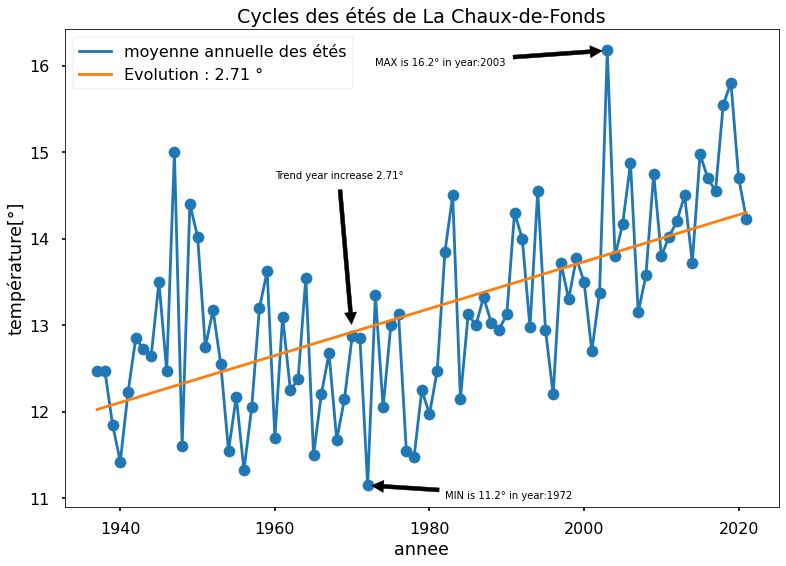

In [35]:
###########  CHAUX-DE-FONDS  #############

df_CDF = pd.read_fwf("homog_mo_CDF.txt",skiprows=460,skipfooter=4,names=['annee','mois','temp CDF','pluie CDF'],index_col=False, infer_nrows=x.size)
x=df_CDF["annee"]# extract collumn : annee
x_year=x[12:x.size:12]#extract only the year from 1900

y = df_CDF['temp CDF']  # extract collumn : température
l = []

for i in range(17, y.size,12):  # can be written in a list comprehension as well...#extract only the year from 1900 --> 17 :because 12 first not usable datas + 5 =JUNE
    j = i + 4  # June =5, 5+4 = 9=  September --> Summer is June --Septembre
    l.append(y[i:j:1].mean())

y_temp_year_mean = pd.Series(l)

# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
ymax_sCDF = max(list(y_temp_year_mean))
xpos_max = list(y_temp_year_mean).index(ymax_sCDF) + 1  # +1 list start from 0
xmax_sCDF = x_year[xpos_max * 12]  # * 12 because series is 12,24,etc....
ymin_sCDF = min(list(y_temp_year_mean))
xpos_min = list(y_temp_year_mean).index(ymin_sCDF) + 1
xmin_sCDF = x_year[xpos_min * 12]  # * 12 because series is 12,24,etc....

fig = plt.figure()
plt.style.use('seaborn-poster')
plt.title("Cycles des étés de La Chaux-de-Fonds")
plt.xlabel("annee")
plt.ylabel("température[°]")

plt.plot(x_year, y_temp_year_mean, label="moyenne annuelle des étés")
plt.legend()
plt.annotate(f'MAX is {round(ymax_sCDF, 1)}° in year:{xmax_sCDF}', xy=(xmax_sCDF, ymax_sCDF), xytext=(xmax_sCDF -30, 16),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'MIN is {round(ymin_sCDF, 1)}° in year:{xmin_sCDF}', xy=(xmin_sCDF, ymin_sCDF), xytext=(xmin_sCDF + 10, 11),
             arrowprops=dict(facecolor='black', shrink=0.05))

x_s = np.array(list(x_year))
y_s = np.array(list(y_temp_year_mean))
plt.scatter(x_s, y_s)

# calculate equation for trendline
zz_sum = np.polyfit(x_s, y_s, 1)  # Y=x*zz3[0]+zz3[1] : https://stackoverflow.com/questions/42985175/how-to-show-equation-of-linear-trendline-made-with-scipy-module-python
pente_sum = zz_sum[0]  # pente is DELTA_Y/DELTA_X
p_sum = np.poly1d(zz_sum)
pente_sum = round(pente_sum*100,2)

# add trendline to plot --># trend line source --> https://www.statology.org/matplotlib-trendline/
plt.plot(x_s, p_sum(x_s), label='Evolution : '+str(pente_sum)+' °')
plt.legend()
plt.annotate(f'Trend year increase {round(pente_sum, 5)}°', xy=(1970, 1970 * zz_sum[0] + zz_sum[1]), xytext=(1960, 14.7), arrowprops=dict(facecolor='black', shrink=0.05))

Je poursuis avec les cycles hivers :

Text(1970, -0.5, 'Trend year increase 1.65°')

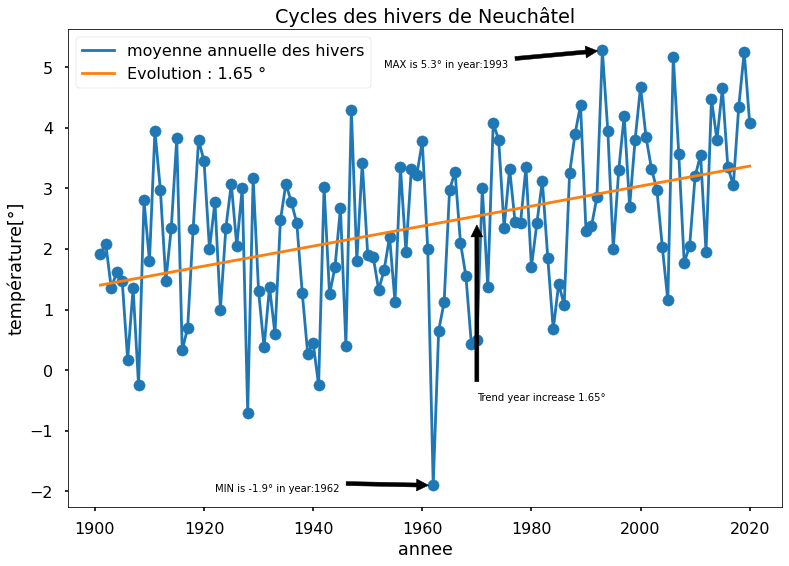

In [36]:
'''-------------------------------------------------Winter cycles-------------------------------------------------'''
###########  NEUCHATEL  #############

x=df_NEU["annee"]# extract collumn : annee
x.drop(x.tail(12).index,inplace=True)
x_year=x[12:x.size:12]#extract only the year from 1900

y=df_NEU['temp NEU']# extract collumn : température
l=[]

for i in range(23,y.size,12):# can be written in a list comprehension as well...#extract only the year from 1900 --> 17 :because 12 first not usable datas + 11 =Decembre
    j=i+4#Decembre 11 =, 11+4 = 15=  March --> Winter is Decembre --March
    l.append(y[i:j:1].mean())

l.pop()#remove the last result because row of 2022 are anyway removed
y_temp_year_mean=pd.Series(l)

# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
ymax_wNEU = max(list(y_temp_year_mean))
xpos_max = list(y_temp_year_mean).index(ymax_wNEU)+1# +1 list start from 0
xmax_wNEU = x_year[xpos_max*12]# * 12 because series is 12,24,etc....
ymin_wNEU = min(list(y_temp_year_mean))
xpos_min = list(y_temp_year_mean).index(ymin_wNEU)+1
xmin_wNEU = x_year[xpos_min*12]# * 12 because series is 12,24,etc....

fig = plt.figure()
plt.style.use('seaborn-poster')       
plt.title("Cycles des hivers de Neuchâtel")
plt.xlabel("annee")
plt.ylabel("température[°]")
plt.plot(x_year,y_temp_year_mean,label="moyenne annuelle des hivers")
plt.legend()

plt.annotate(f'MAX is {round(ymax_wNEU,1)}° in year:{xmax_wNEU}',xy=(xmax_wNEU, ymax_wNEU),xytext=(xmax_wNEU-40,5),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'MIN is {round(ymin_wNEU,1)}° in year:{xmin_wNEU}',xy=(xmin_wNEU, ymin_wNEU),xytext=(xmin_wNEU-40,-2),arrowprops=dict(facecolor='black', shrink=0.05))

x_s=np.array(list(x_year))
y_s=np.array(list(y_temp_year_mean))
plt.scatter(x_s,y_s)

# calculate equation for trendline
zz = np.polyfit(x_s,y_s, 1)# Y=x*zz[0]+zz[1] : https://stackoverflow.com/questions/42985175/how-to-show-equation-of-linear-trendline-made-with-scipy-module-python
pente_win=zz[0]#pente is DELTA_Y/DELTA_X
p = np.poly1d(zz)
pente_win = round(pente_win*100,2)

# add trendline to plot --># trend line source --> https://www.statology.org/matplotlib-trendline/
plt.plot(x_s, p(x_s),label='Evolution : '+str(pente_win)+' °')
plt.legend()
plt.annotate(f'Trend year increase {round(pente_win,5)}°',xy=(1970, 1970*zz[0]+zz[1]),xytext=(1970,-0.5),arrowprops=dict(facecolor='black', shrink=0.05))

Text(1980, -3.75, 'Trend year increase 1.58°')

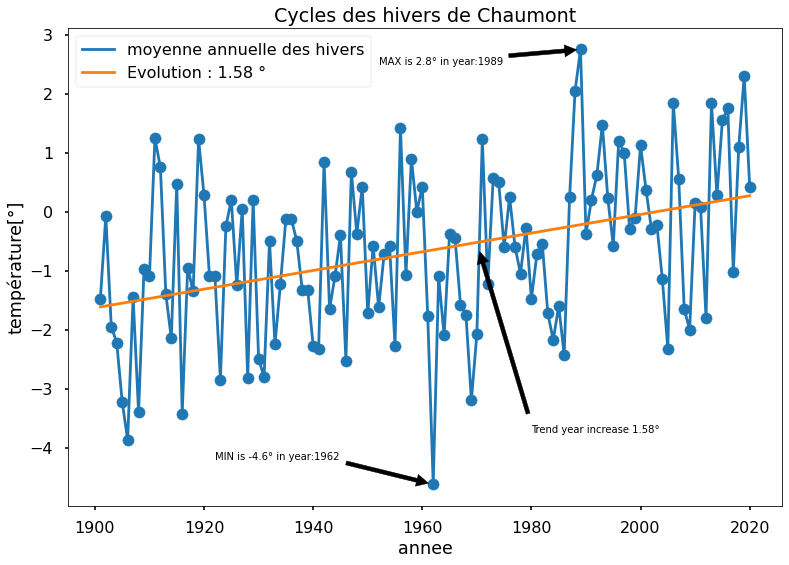

In [37]:
###########  CHAUMONT  #############

x=df_CHM["annee"]# extract collumn : annee
x.drop(x.tail(12).index,inplace=True)
x_year=x[12:x.size:12]#extract only the year from 1900

y=df_CHM['temp CHM']# extract collumn : température
l=[]

for i in range(23,y.size,12):# can be written in a list comprehension as well...#extract only the year from 1900 --> 17 :because 12 first not usable datas + 11 =Decembre
    j=i+4#Decembre 11 =, 11+4 = 15=  March --> Winter is Decembre --March
    l.append(y[i:j:1].mean())

l.pop()#remove the last result because row of 2022 are anyway removed
y_temp_year_mean=pd.Series(l)

# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
ymax_wCHM = max(list(y_temp_year_mean))
xpos_max = list(y_temp_year_mean).index(ymax_wCHM)+1# +1 list start from 0
xmax_wCHM = x_year[xpos_max*12]# * 12 because series is 12,24,etc....
ymin_wCHM = min(list(y_temp_year_mean))
xpos_min = list(y_temp_year_mean).index(ymin_wCHM)+1
xmin_wCHM = x_year[xpos_min*12]# * 12 because series is 12,24,etc....

fig = plt.figure()
plt.style.use('seaborn-poster')       
plt.title("Cycles des hivers de Chaumont")
plt.xlabel("annee")
plt.ylabel("température[°]")
plt.plot(x_year,y_temp_year_mean,label="moyenne annuelle des hivers")
plt.legend()

plt.annotate(f'MAX is {round(ymax_wCHM,1)}° in year:{xmax_wCHM}',xy=(xmax_wCHM, ymax_wCHM),xytext=(xmax_wCHM-37,2.5),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'MIN is {round(ymin_wCHM,1)}° in year:{xmin_wCHM}',xy=(xmin_wCHM, ymin_wCHM),xytext=(xmin_wCHM-40,-4.2),arrowprops=dict(facecolor='black', shrink=0.05))

x_s=np.array(list(x_year))
y_s=np.array(list(y_temp_year_mean))
plt.scatter(x_s,y_s)

# calculate equation for trendline
zz = np.polyfit(x_s,y_s, 1)# Y=x*zz[0]+zz[1] : https://stackoverflow.com/questions/42985175/how-to-show-equation-of-linear-trendline-made-with-scipy-module-python
pente_win=zz[0]#pente is DELTA_Y/DELTA_X
p = np.poly1d(zz)
pente_win = round(pente_win*100,2)

# add trendline to plot --># trend line source --> https://www.statology.org/matplotlib-trendline/
plt.plot(x_s, p(x_s),label='Evolution : '+str(pente_win)+' °')
plt.legend()
plt.annotate(f'Trend year increase {round(pente_win,5)}°',xy=(1970, 1970*zz[0]+zz[1]),xytext=(1980,-3.75),arrowprops=dict(facecolor='black', shrink=0.05))

Text(1980, -3.75, 'Trend year increase 3.02°')

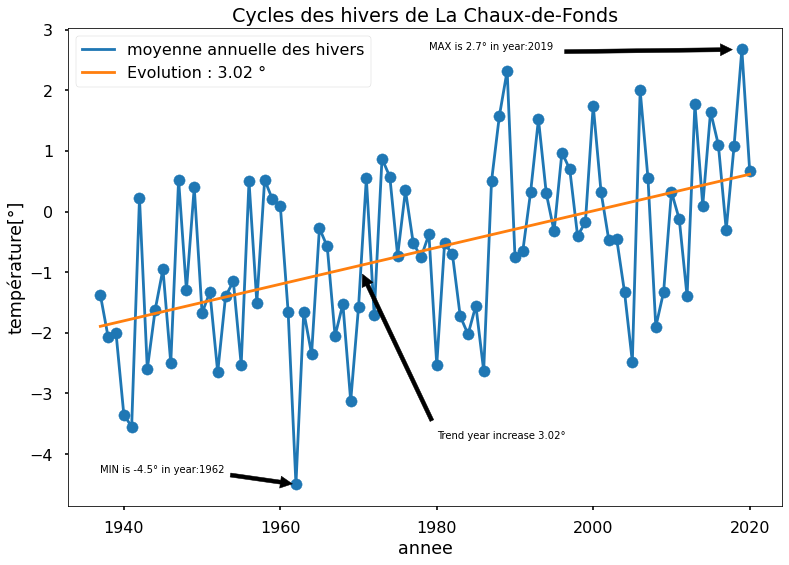

In [38]:
###########  CHAUX-DE-FONDS  #############

x=df_CDF["annee"]# extract collumn : annee
x.drop(x.tail(12).index,inplace=True)
x_year=x[12:x.size:12]#extract only the year from 1900

y=df_CDF['temp CDF']# extract collumn : température
l=[]

for i in range(23,y.size,12):# can be written in a list comprehension as well...#extract only the year from 1900 --> 17 :because 12 first not usable datas + 11 =Decembre
    j=i+4#Decembre 11 =, 11+4 = 15=  March --> Winter is Decembre --March
    l.append(y[i:j:1].mean())

l.pop()#remove the last result because rows of 2022 are anyway removed
y_temp_year_mean=pd.Series(l)

# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
ymax_wCDF = max(list(y_temp_year_mean))
xpos_max = list(y_temp_year_mean).index(ymax_wCDF)+1# +1 list start from 0
xmax_wCDF = x_year[xpos_max*12]# * 12 because series is 12,24,etc....
ymin_wCDF = min(list(y_temp_year_mean))
xpos_min = list(y_temp_year_mean).index(ymin_wCDF)+1
xmin_wCDF = x_year[xpos_min*12]# * 12 because series is 12,24,etc....

fig = plt.figure()
plt.style.use('seaborn-poster')       
plt.title("Cycles des hivers de La Chaux-de-Fonds")
plt.xlabel("annee")
plt.ylabel("température[°]")
plt.plot(x_year,y_temp_year_mean,label="moyenne annuelle des hivers")
plt.legend()

plt.annotate(f'MAX is {round(ymax_wCDF,1)}° in year:{xmax_wCDF}',xy=(xmax_wCDF, ymax_wCDF),xytext=(xmax_wCDF-40,2.67),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'MIN is {round(ymin_wCDF,1)}° in year:{xmin_wCDF}',xy=(xmin_wCDF, ymin_wCDF),xytext=(xmin_wCDF-25,-4.3),arrowprops=dict(facecolor='black', shrink=0.05))

x_s=np.array(list(x_year))
y_s=np.array(list(y_temp_year_mean))
plt.scatter(x_s,y_s)

# calculate equation for trendline
zz = np.polyfit(x_s,y_s, 1)# Y=x*zz[0]+zz[1] : https://stackoverflow.com/questions/42985175/how-to-show-equation-of-linear-trendline-made-with-scipy-module-python
pente_win=zz[0]#pente is DELTA_Y/DELTA_X
p = np.poly1d(zz)
pente_win = round(pente_win*100,2)

# add trendline to plot --># trend line source --> https://www.statology.org/matplotlib-trendline/
plt.plot(x_s, p(x_s),label='Evolution : '+str(pente_win)+' °')
plt.legend()
plt.annotate(f'Trend year increase {round(pente_win,5)}°',xy=(1970, 1970*zz[0]+zz[1]),xytext=(1980,-3.75),arrowprops=dict(facecolor='black', shrink=0.05))

Au lieu de reprendre les mêmes noms de variables pour les différents graphiques, je les ai isolé afin de les regrouper dans un dataframe, ce sera plus simple pour comparer les résultats :

In [39]:
cycles = [
    ("Neuchâtel", xmax_sNEU, ymax_sNEU, xmin_sNEU, ymin_sNEU, xmax_wNEU, ymax_wNEU, xmin_wNEU, ymin_wNEU),
    ("Chaumont", xmax_sCHM, ymax_sCHM, xmin_sCHM, ymin_sCHM, xmax_wCHM, ymax_wCHM, xmin_wCHM, ymin_wCHM),
    ("Chaux-de-Fonds", xmax_sCDF, ymax_sCDF, xmin_sCDF, ymin_sCDF, xmax_wCDF, ymax_wCDF, xmin_wCDF, ymin_wCDF)
]
cols = ["Station", "Année été max", "Temp été max", "Année été min", "Temp été min", "Année hiver max", "Temp hiver max", "Année hiver min", "Temp hiver min"]

df_cycles = pd.DataFrame(data=cycles, columns=cols)
df_cycles

,Station,Année été max,Temp été max,Année été min,Temp été min,Année hiver max,Temp hiver max,Année hiver min,Temp hiver min
0,Neuchâtel,2003,20.825,1912,14.050,1993,5.275,1962,-1.900
1,Chaumont,2003,16.250,1912,9.125,1989,2.750,1962,-4.625
2,Chaux-de-Fonds,2003,16.175,1972,11.150,2019,2.675,1962,-4.500


En synthétisant les données précédemment obtenues, on obtient le dataframe ci-dessus. On observe que les températures sont très similaires entre les stations de Chaumont et de La Chaux-de-Fonds, cela peut s'expliquer par le fait qu'elles sont toutes deux situées à une altitude équivalente (env. 1'000 m).

Pour les étés, nous constatons les résultats suivants :
> <p> l'été 1912 a été le plus froid pour Neuchâtel et Chaumont alors que pour La Chaux-de-Fonds, c'est l'été de 1972 ;

> <p> l'été 2003 a été le plus chaud ;

Pour les hivers les plus froid :
> <p> l'hiver 1962 a été le plus froid ;

Pour les hivers les plus chauds, cela diffère selon les stations :
> <p> les hivers les plus chauds ont été 1993 pour Neuchâtel, 1989 pour Chaumont et 2019 pour La Chaux-de-Fonds ;

L'augmentation des températures est similaire entre Neuchâtel et La Chaux-de-Fonds, celle de Chaumont étant légérement plus importante. Les pics positifs et négatifs sont les mêmes :
> <p> la tendance montre une augmentation des températures constantes autant en été qu'en hiver ;
    
> <p> on observe trois pics caniculaires ne représentant pas de cycles réguliers ;
    
> <p> les pics hivernaux sont plus nombreux mais de plus en plus chauds


Je souhaite maintenant isoler les évolutions des températures par génération de 20 ans afin de déterminer les pics d'évolution éventuels.

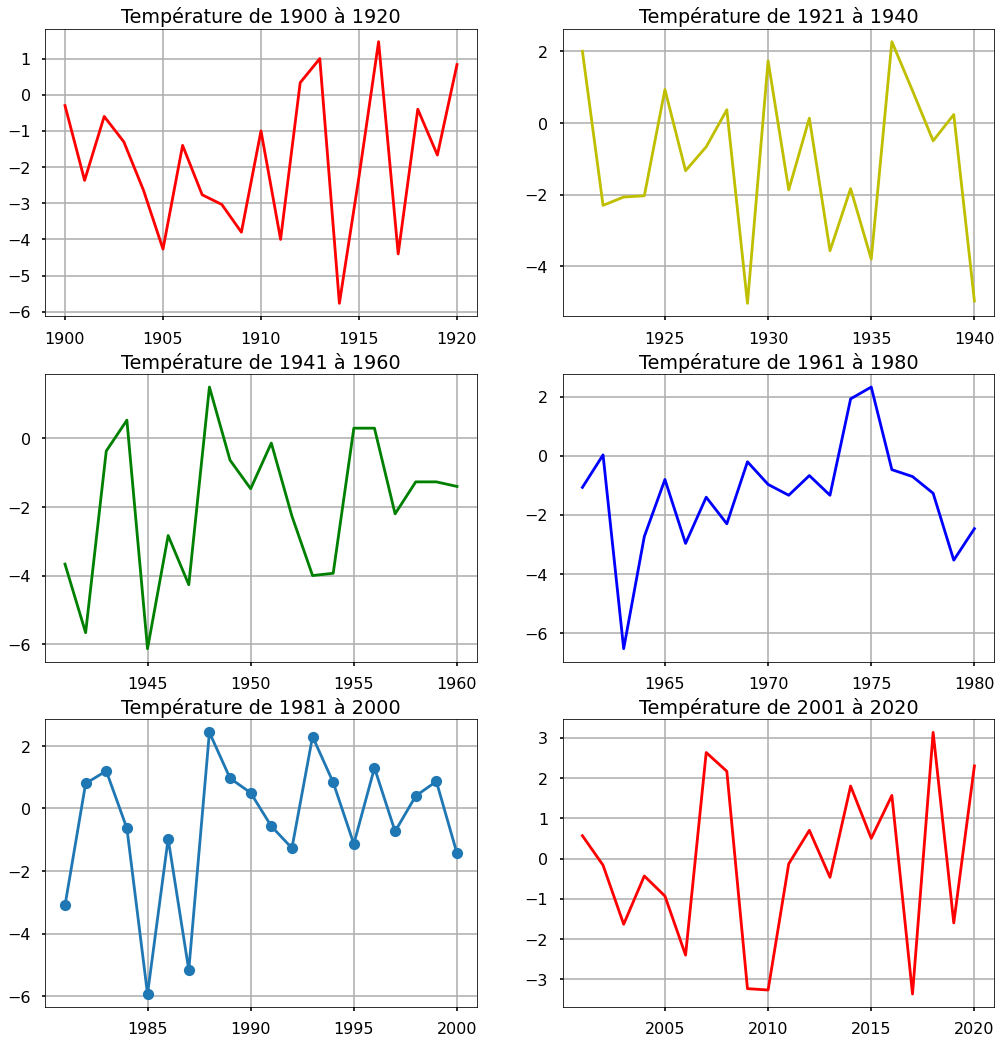

In [40]:
'''-------------------------------------------------Cleaning databases-------------------------------------------------'''
df_NEU = pd.read_fwf("homog_mo_NEU.txt",skiprows=460,skipfooter=4,names=['annee','mois','temp NEU','pluie NEU'],index_col=False)
df_CHM = pd.read_fwf("homog_mo_CHM.txt",skiprows=460,skipfooter=4,names=['annee','mois','temp CHM','pluie CHM'],index_col=False)
df_CDF = pd.read_fwf("homog_mo_CDF.txt",skiprows=28,skipfooter=4,names=['annee','mois','temp CDF','pluie CDF'],index_col=False)

'''-------------------------------------------------Concatenation databases-------------------------------------------------'''
# delete columns and concatenation for a global table of data
del df_CHM["annee"]
del df_CHM["mois"]
del df_CDF["annee"]
del df_CDF["mois"]
df = pd.concat([df_NEU,df_CHM,df_CDF], axis=1)

# cleaning for average of temperature and dive
df_pluieNEU = df["pluie NEU"] # extract column pluie for insert it later
df_pluieCHM = df["pluie CHM"]
df_pluieCDF = df["pluie CDF"]
del df["pluie NEU"]
del df["pluie CHM"]
del df["pluie CDF"]
del df["mois"]
df_annee = df["annee"] # extract column annee for insert it later
del df["annee"]
x = df.mean(axis=1) # average of temperature
df["pluie NEU"] = df_pluieNEU # insert column pluie
df["pluie CHM"] = df_pluieCHM
df["pluie CDF"] = df_pluieCDF
del df["temp NEU"]
del df["temp CHM"]
del df["temp CDF"]
xx = df.mean(axis=1) # average of dive
df["annee"] = df_annee # insert column annee
del df["pluie NEU"]
del df["pluie CHM"]
del df["pluie CDF"]
df["temp moy"] = x  # insert column average of temperature
df["pluie moy"] = xx # insert column average of dive

# cleaning for plot
a20 = df.loc[(df['annee'] >= 1900) & (df['annee'] <= 1920)]
a40 = df.loc[(df['annee'] >= 1921) & (df['annee'] <= 1940)]
a60 = df.loc[(df['annee'] >= 1941) & (df['annee'] <= 1960)]
a80 = df.loc[(df['annee'] >= 1961) & (df['annee'] <= 1980)]
a00 = df.loc[(df['annee'] >= 1981) & (df['annee'] <= 2000)]
a2020 = df.loc[(df['annee'] >= 2001) & (df['annee'] <= 2020)]

# datas for plot
x20 = a20["annee"]
x_year20 = x20[0:x.size:12]
y20 = a20["temp moy"]
y_year20 = y20[0:x.size:12]

x40 = a40["annee"]
x_year40 = x40[0:x.size:12]
y40 = a40["temp moy"]
y_year40 = y40[0:x.size:12]

x60 = a60["annee"]
x_year60 = x60[0:x.size:12]
y60 = a60["temp moy"]
y_year60 = y60[0:x.size:12]

x80 = a80["annee"]
x_year80 = x80[0:x.size:12]
y80 = a80["temp moy"]
y_year80 = y80[0:x.size:12]

x00 = a00["annee"]
x_year00 = x00[0:x.size:12]
y00 = a00["temp moy"]
y_year00 = y00[0:x.size:12]

x2020 = a2020["annee"]
x_year2020 = x2020[0:x.size:12]
y2020 = a2020["temp moy"]
y_year2020 = y2020[0:x.size:12]

# making plot
fig = plt.figure(1, figsize=(17, 18))
plt.style.use('seaborn-poster')
plt.subplot(3,2,1)    # 2 lignes, 3 colonnes, position dans le tableau
plt.title("Température de 1900 à 1920")
plt.plot(x_year20,y_year20, '-r')
plt.grid(True)

plt.subplot(3,2,2)   
plt.title("Température de 1921 à 1940")
plt.plot(x_year40,y_year40, '-y')
plt.grid(True)

plt.subplot(3,2,3)   
plt.title("Température de 1941 à 1960")
plt.plot(x_year60,y_year60, '-g')
plt.grid(True)

plt.subplot(3,2,4)   
plt.title("Température de 1961 à 1980")
plt.plot(x_year80,y_year80, '-b')
plt.grid(True)

plt.subplot(3,2,5)   
plt.title("Température de 1981 à 2000")
plt.plot(x_year00,y_year00, '-o')
plt.grid(True)

plt.subplot(3,2,6)   
plt.title("Température de 2001 à 2020")
plt.plot(x_year2020,y_year2020, '-r')
plt.grid(True)

Ces subplots mettent en avant les pics de températures par génération, on en observe 4 :

> <p> le premier est pendant la période entre 1921 et 1940 ;
    
> <p> le second et le troisième pic sont respectivement durant les périodes entre 1961 / 1980 et 1981 / 2000, avec une progession allant jusqu'à plus de 2°C ;
    
> <p> le dernier pic observé est celui situé entre 2001 et 2020 avec une augmentation significative de la température allant jusqu'à 3°C.

<h1 style="color:#0b3fcd;font-size:33px">3. Conclusion

Les résultats démontrent une augmentation des températures aussi bien en été qu'en hiver avec une phase ascendante qui a débuté dans les années 1970. On émet 'hypothèse que ceci pourrait être en corrèlation avec la forte industrialisation des pays européens à la même période. Néanmoins, je peux conclure que nous sommes dans une période de réchauffement qui s'accélère rapidement. 

Les conséquences à terme peuvent être très variées car ce ne sont que des hypothèses de scénarios, mais voici des exemples de ce à quoi nous pouvons nous attendre :

> des étés caniculaires amenant des périodes de sécheresse de plus en plus longues ;

> des hivers de moins en moins froids ce qui limitera le renouvellement des eaux dans les nappes phréatiques avec la fonte des neiges ;

> une qualité de l'air de plus en plus mauvaise

> ces dérèglements entraineront des changements climatiques majeurs (tempêtes et tornades plus fréquentes, inondations plus intenses lors de fort épisodes pluvieux, ...)

En complément de mon analyse, je vous invite à visiter ces liens pour avoir une idée très claire de l'évolution des températures mondiales :
> https://www.youtube.com/watch?v=jWoCXLuTIkI
> <p style="color:green">Vidéo mise en ligne par la Nasa illustrant les changements de température de 1880 à 2021 ;

Cette animation est largement inspirée de celle créée par Ed Hawkins et disponible à cette adresse :
> https://cpb-eu-w2.wpmucdn.com/blogs.reading.ac.uk/dist/3/187/files/2021/01/spiral_2020_large.gif
> <p style="color:green">Ceci est la version mise à jour avec les données de 1850 à 2020

<h2 style="color:#2c91ff;font-size:25px">3.1 Limites et perspectives

Cette analyse n'est pas finalisée à 100%, pour affiner au maximum ce projet, il aurait fallu que j'ai accès à des données plus complètes qui se révèlent la plupart du temps payantes. Grâce à celles-ci, je pourrais vous proposer une analyse météorologique plus poussée en intégrant les bulletins d'enneigement, les cycles caniculaires et orageux, les durées d'ensoleillement ... tout cela rentre en jeu pour déterminer si le climat change dans sa globalité ou juste sur quelques critères.

Les perspectives de ce projet sont nombreuses, en plus des compléments cités précédemment, il serait possible de faire une analyse complémentaire avec une comparaison des tendances entre Neuchâtel et l'ensemble de la Suisse, et pourquoi au niveau mondial ! 

Néanmoins, je vous propose ce widget qui permet d'obtenir une moyenne des températures et des précipitations pour quelques stations majeures de Suisse :

In [8]:
city_dropdown = ipw.Dropdown(options=['Bâle', 'Bern', 'Chaumont', 'Chaux-De-Fonds', 'Davos', 'Genève', 'Grand St-Bernard', 'Lugano', 'Neuchâtel', 'Zürich'], value='Chaux-De-Fonds', description='City selection:', disabled=False)
values_dropdown = ipw.Dropdown(options=['Température', 'Précipitations'], value='Température', description='Values selection:', disabled=False)
season_dropdown = ipw.Dropdown(options=['summer', 'winter', 'all'], value='all', description='season selection:', disabled=False)
timeline_sliderRange=ipw.IntRangeSlider(value=[1900, 2201], min=1900, max=2021,step=1,description='Timeline:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='d')
trendline_toggle = ipw.ToggleButton(value=True, description='Trendline', button_style='', tooltip='Display trendline (or not)', icon='eye')

debug_toggle = ipw.ToggleButton(value=False, description='Debug', button_style='', tooltip='Display debug (or not)', icon='eye')

# 2) Function called when widget's value is changed
def _graph_(city,value,season,timeline,trendline,debug):
    fig = plt.figure() #source#https://pythonguides.com/matplotlib-increase-plot-size/#:~:text=Import%20matplotlib.,-pyplot%20library.&text=To%20change%20the%20figure%20size,use%20the%20show()%20function
    plt.style.use('seaborn-poster') 
    plt.xlabel("annee")
    if value=='Température':
        plt.ylabel("température[°]")
    elif value=='Précipitations':
        plt.ylabel("précipitations[mm]")
     
    if city=='Chaux-De-Fonds':# here is the place to add when new database is added
        path='homog_mo_CDF.txt'
        if value=='Température':
            plt.title("CDF temperature")
        elif value=='Précipitations':
            plt.title("CDF précipitations")
    elif city =='Neuchâtel':
        path='homog_mo_NEU.txt'
        if value=='Température':
            plt.title("Neuchâtel temperature")
        elif value=='Précipitations':
            plt.title("Neuchâtel précipitations")
    elif city=='Chaumont':
        path='homog_mo_CHM.txt'
        if value=='Température':
            plt.title("Chaumont temperature")
        elif value=='Précipitations':
            plt.title("Chaumont précipitations")
    elif city=='Genève':
        path='homog_mo_GVE.txt'
        if value=='Température':
            plt.title("Genève temperature")
        elif value=='Précipitations':
            plt.title("Genève précipitations")
    elif city=='Bâle':
        path='homog_mo_BAL.txt'
        if value=='Température':
            plt.title("Bâle temperature")
        elif value=='Précipitations':
            plt.title("Bâle précipitations")
    elif city=='Zürich':
        path='homog_mo_ZUR.txt'
        if value=='Température':
            plt.title("Zürich temperature")
        elif value=='Précipitations':
            plt.title("Zürich précipitations")
    elif city=='Bern':
        path='homog_mo_BER.txt'
        if value=='Température':
            plt.title("Bern temperature")
        elif value=='Précipitations':
            plt.title("Bern précipitations")
    elif city=='Davos':
        path='homog_mo_DAV.txt'
        if value=='Température':
            plt.title("Davos temperature")
        elif value=='Précipitations':
            plt.title("Davos précipitations")
    elif city=='Grand St-Bernard':
        path='homog_mo_GSB.txt'
        if value=='Température':
            plt.title("Grand St-Bernard temperature")
        elif value=='Précipitations':
            plt.title("Grand St-Bernard précipitations")
    elif city=='Lugano':
        path='homog_mo_LUG.txt'
        if value=='Température':
            plt.title("Lugano temperature")
        elif value=='Précipitations':
            plt.title("Lugano précipitations")
                 
    # source : https://towardsdatascience.com/parsing-fixed-width-text-files-with-pandas-f1db8f737276
    #Attention très important le fichier doit être codé en UTF-8 sinon on peut avoir des soucis !!!!
    df=pd.read_fwf(path,skiprows=28,names=['annee','mois','température','précipitations'],index_col=False)# we skip the 28 first lines as this is common for all databases
    footerToDelete=len(df[df['annee'] == 2022])#because year 2022 is on going
    df=pd.read_fwf(path,skiprows=28,skipfooter=footerToDelete,names=['annee','mois','température','précipitations'],index_col=False,infer_nrows=len(df))#infer_nrows is mandatory because analyse of the 100 first lines is NOK. I.e when -11.7(4 digits) appears after the 100 first lines and on the 100 first lines was only 3 digits value then we have problem
    df=df[(df['annee']>=1900)]#remove all rows before year 1900
    df=df[(df['annee']>=timeline[0])&(df['annee']<=timeline[1])]#remove all rows depending parameter timeline
    df_temp=df.drop('précipitations', inplace=False, axis=1)#create a new data frame for only temperature
    df_preci=df.drop('température', inplace=False, axis=1)#create a new data frame for only précipitations
    df_temp = df_temp.dropna()#remove any NaN rows
    df_preci = df_preci.dropna()#remove any NaN rows
    df_temp.reset_index(drop=True, inplace=True)#reindex properly from 0,1,2,3, etc...
    
    if debug ==True:
        print(df_temp);print(type(df_temp))
    df_preci.reset_index(drop=True, inplace=True)#reindex properly from 0,1,2,3, etc...
    if debug ==True:
        print(df_preci);print(type(df_preci))
    
    if value=='Température':
        s_grouped_year=df_temp['annee'].drop_duplicates()#remove and keep only one
        s_grouped_year.reset_index(drop=True, inplace=True)#re_index properly
        if debug ==True:
               print(s_grouped_year);print(type(s_grouped_year))
    elif value=='Précipitations':
        s_grouped_year=df_preci['annee'].drop_duplicates()#remove and keep only one
        s_grouped_year.reset_index(drop=True, inplace=True)#re_index properly
        if debug ==True:
            print(s_grouped_year);print(type(s_grouped_year))
    
    if season=='all':
        labels=''
        s_year_meanTemp=df_temp.groupby(df_temp['annee']).température.mean()
        s_year_meanPreci=df_preci.groupby(df_preci['annee']).précipitations.mean()
    elif season=='summer':
        labels=' des étés'
        l_months_selection=[6,7,8]# 1=January....12=Decembre
        s_monthByYear_meanTemp_sommer=df_temp.groupby(df_temp['annee'][df_temp['mois'].isin(l_months_selection)]).température.mean()
        s_monthByYear_meanPreci_sommer=df_preci.groupby(df_preci['annee'][df_preci['mois'].isin(l_months_selection)]).précipitations.mean()
    elif season=='winter':
        labels=' des hivers'
        l_months_selection=[1,2,3]# 1=January....12=Decembre
        s_monthByYear_meanTemp_winter=df_temp.groupby(df_temp['annee'][df_temp['mois'].isin(l_months_selection)]).température.mean()
        s_monthByYear_meanPreci_winter=df_preci.groupby(df_preci['annee'][df_preci['mois'].isin(l_months_selection)]).précipitations.mean()
    
    if value=='Température':
        if season =='all':
            values_selection=s_year_meanTemp
        elif season=='summer':
            values_selection= s_monthByYear_meanTemp_sommer
        elif season=='winter':
            values_selection=s_monthByYear_meanTemp_winter
    elif value=='Précipitations':
        if season =='all':
            values_selection=s_year_meanPreci
        elif season=='summer':
            values_selection=s_monthByYear_meanPreci_sommer
        elif season=='winter':
            values_selection=s_monthByYear_meanPreci_winter
    if debug ==True:
         print(values_selection);print(type(values_selection))
    
    ymax = values_selection.max()
    xmax=values_selection.idxmax()
    ymin =values_selection.min()
    xmin =values_selection.idxmin()
    
    plt.plot(s_grouped_year,values_selection,label="moyenne annuelle"+labels)
    plt.legend()
    plt.annotate(f'MAX is {round(ymax,1)} in year:{xmax}',xy=(xmax, ymax),xytext=(xmax,ymax),arrowprops=dict(facecolor='black', shrink=0.05)) # because tendance is to go higher, we can say we have place fort the text at xmax-40
    plt.annotate(f'MIN is {round(ymin,1)} in year:{xmin}',xy=(xmin, ymin),xytext=(xmin,ymin),arrowprops=dict(facecolor='black', shrink=0.05))   # because tendance is to go higher, we can say we have place fort the text at xmin+20
 
    if trendline :
        x_scatter=np.array(s_grouped_year)
        y_scatter=np.array(values_selection)

        # calculate equation for trendline
        coef = np.polyfit(x_scatter,y_scatter, 1)# Y=x*coef[0]+coef[1] : https://stackoverflow.com/questions/42985175/how-to-show-equation-of-linear-trendline-made-with-scipy-module-python
        dydx=coef[0]#slope is DELTA_Y/DELTA_X
        polynomial = np.poly1d(coef)

        # #add trendline to plot --># trend line source --> https://www.statology.org/matplotlib-trendline/
        plt.plot(x_scatter, polynomial(x_scatter),label="trendline")
        plt.legend()
        xpos=(timeline[0]+timeline[1])/2
        ypos=xpos*coef[0]+coef[1]
        plt.annotate(f'Trend year increase {round(dydx,5)}',xy=(xpos, ypos),xytext=(xpos,ypos),arrowprops=dict(facecolor='black', shrink=0.05))#1970 is a good place for the arrow because there are always a gap

# 3) Connection widget --> function
ipw.interact(_graph_, city=city_dropdown,value=values_dropdown,season=season_dropdown,trendline=trendline_toggle,timeline=timeline_sliderRange,debug=debug_toggle)

interactive(children=(Dropdown(description='City selection:', index=3, options=('Bâle', 'Bern', 'Chaumont', 'C…

<function __main__._graph_(city, value, season, timeline, trendline, debug)>